In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
from scipy.stats import skew 
from tqdm import tqdm # Visualization of loop progress
import matplotlib.pyplot as plt

# EDA:
- How many documents/sentences/tokens are there in your input corpus? 
- What are the length distributions of documents and sentences? Any outliers?
- What is the distribution of all tokens? How many "rare" tokens (e.g., < 5 times)? 
- Is there any pre-processing required? e.g., remove the consecutive whitespace, remove some "weird" characters.
- Run AutoPhrase, and then plot the quality score distribution of single-word and multi-word phrases separately. Compare and discuss their differences.

In [2]:
data_dir = '../data'
raw_train_fp = data_dir + '/EN/DBLP.txt'

In [3]:
counter = 0
dblp_raw = open(raw_train_fp, 'r').readlines()
# for line in dblp_raw:
#     print(line)
#     counter += 1
#     if counter > 10:
#         break

## How many documents/sentences/tokens are there in your input corpus? 

- **Document counts**

In [4]:
tmp_doc = ''
all_doc = []
for sent in tqdm(dblp_raw):
    if sent == '.\n':
        if len(tmp_doc) != 0:
            all_doc.append(tmp_doc.replace('\n', ' '))
        tmp_doc = ''
    elif sent != '\n':
        tmp_doc += sent

100%|██████████| 5547032/5547032 [00:03<00:00, 1623640.60it/s]


In [5]:
dblp_raw[50:60]

['Spatial Data Structures.\n',
 '.\n',
 'An overview is presented of the use of spatial data structures in spatial databases. The focus is on hierarchical data structures, including a number of variants of quadtrees, which sort the data with respect to the space occupied by it. Such techniques are known as spatial indexing methods. Hierarchical data structures are based on the principle of recursive decomposition. They are attractive because they are compact and depending on the nature of the data they save space as well as time and also facilitate operations such as search. Examples are given of the use of these data structures in the representation of different data types such as regions, points, rectangles, lines, and volumes.\n',
 '\n',
 'Spatial Data Models and Query Processing.\n',
 '.\n',
 'Pegasus: A Heterogeneous Information Management System.\n',
 '.\n',
 'Temporal Object-Oriented Databases: A Critical Comparison.\n',
 '.\n']

In [6]:
len(all_doc)

2243972

In [7]:
all_doc[:10]

['OQL[C++]: Extending C++ with an Object Query Capability. ',
 'Transaction Management in Multidatabase Systems. ',
 'Overview of the ADDS System. ',
 'Multimedia Information Systems: Issues and Approaches. ',
 'Active Database Systems. ',
 'Where Object-Oriented DBMSs Should Do Better: A Critique Based on Early Experiences. ',
 'Distributed Databases. ',
 'An Object-Oriented DBMS War Story: Developing a Genome Mapping Database in C++. ',
 'Cooperative Transactions for Multiuser Environments. ',
 'Schema Architecture of the UniSQL/M Multidatabase System ']

- **Sentence counts**

In [8]:
all_sent = []
for doc in tqdm(all_doc):
    for sent in doc.split('. '):
        if len(sent) != 0:
            all_sent.append(sent)

100%|██████████| 2243972/2243972 [00:04<00:00, 544502.32it/s]


In [9]:
len(all_sent)

5493596

- **Token counts**

In [10]:
all_token = []
for sent in tqdm(all_sent):
    for token in sent.split():
        if len(token) != 0:
            all_token.append(token)

100%|██████████| 5493596/5493596 [00:24<00:00, 222734.41it/s]


In [44]:
len(all_token)

91614093

## What are the length distributions of documents and sentences? Any outliers?
- **Length distribution of documents**

100%|██████████| 2243972/2243972 [00:15<00:00, 141343.26it/s]


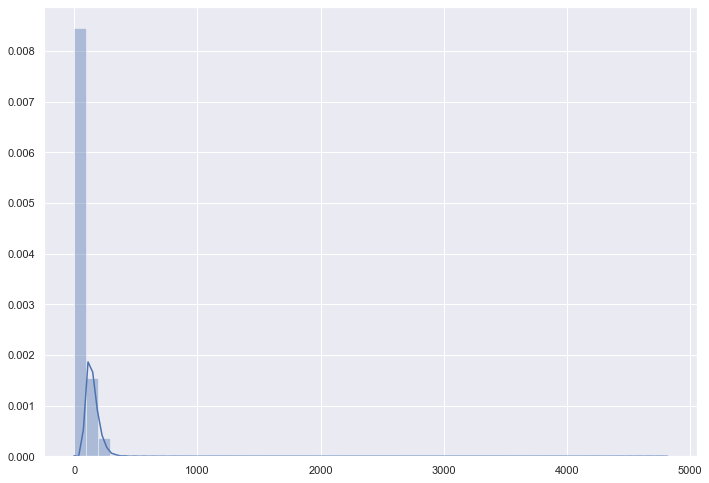

In [64]:
doc_length = [len(doc.split()) for doc in tqdm(all_doc)]
sns.distplot(doc_length)

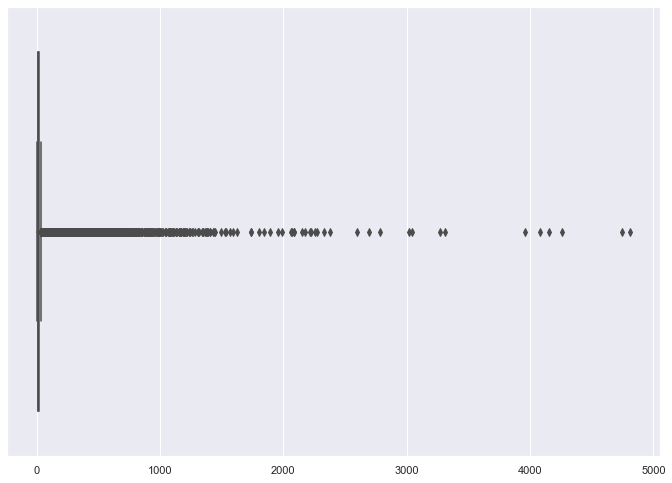

In [65]:
sns.boxplot(doc_length)

In [46]:
skew(doc_length)

3.565261537203435

In [49]:
np.percentile(doc_length, 10), np.percentile(doc_length, 25), np.percentile(doc_length, 50), np.mean(doc_length),\
np.percentile(doc_length, 75), np.percentile(doc_length, 90) 

(5.0, 7.0, 10.0, 40.829161861199694, 19.0, 147.0)

In [53]:
522636 / 2243972

0.23290664945908415

In [13]:
# Calculating outlier
Q1 = np.percentile(doc_length, 25) 
  
# Third quartile (Q3) 
Q3 = np.percentile(doc_length, 75) 

In [14]:
outlier_cutoff = Q3 + 1.5 * (Q3 - Q1)
outlier_cutoff

37.0

In [22]:
outlier_count = 0
outlier_samples = []
for i in tqdm(range(len(doc_length))):
    if doc_length[i] > outlier_cutoff:
        outlier_count += 1
        if len(outlier_samples) < 20:
            outlier_samples.append(all_doc[i])

100%|██████████| 2243972/2243972 [00:01<00:00, 1842001.63it/s]


In [23]:
outlier_count

522636

In [25]:
outlier_samples[0]

'An overview is presented of the use of spatial data structures in spatial databases. The focus is on hierarchical data structures, including a number of variants of quadtrees, which sort the data with respect to the space occupied by it. Such techniques are known as spatial indexing methods. Hierarchical data structures are based on the principle of recursive decomposition. They are attractive because they are compact and depending on the nature of the data they save space as well as time and also facilitate operations such as search. Examples are given of the use of these data structures in the representation of different data types such as regions, points, rectangles, lines, and volumes. Spatial Data Models and Query Processing. '

In [61]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

- **Length distribution of sentences**

100%|██████████| 5493596/5493596 [00:11<00:00, 479651.67it/s]


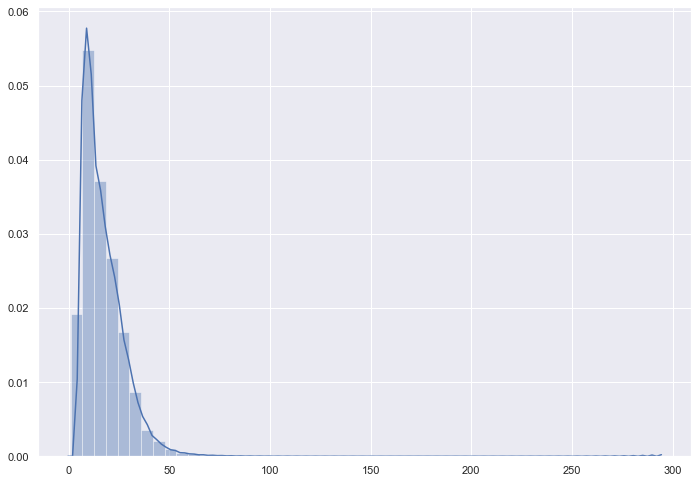

In [62]:
sent_length = [len(sent.split()) for sent in tqdm(all_sent)]
sns.distplot(sent_length)

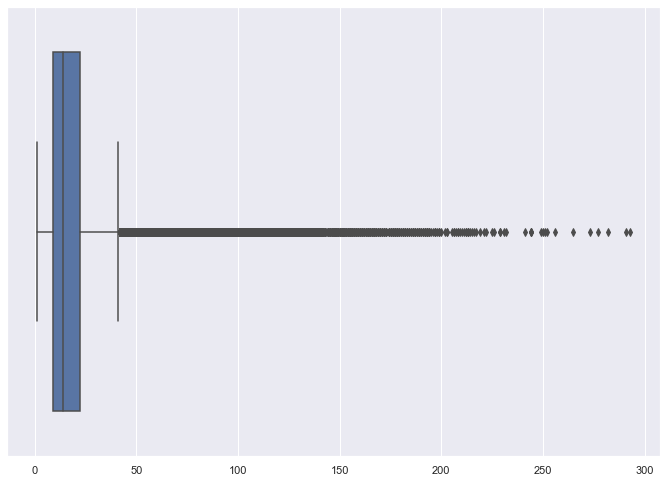

In [63]:
sns.boxplot(sent_length)

In [52]:
np.percentile(sent_length, 10), np.percentile(sent_length, 25), np.percentile(sent_length, 50), np.mean(sent_length),\
np.percentile(sent_length, 75), np.percentile(sent_length, 90), skew(sent_length)

(6.0, 9.0, 14.0, 16.676525357889442, 22.0, 30.0, 1.9212947995441783)

In [66]:
# Calculating outlier
Q1 = np.percentile(sent_length, 25) 
  
# Third quartile (Q3) 
Q3 = np.percentile(sent_length, 75) 

In [67]:
outlier_cutoff = Q3 + 1.5 * (Q3 - Q1)
outlier_cutoff

41.5

In [68]:
outlier_count = 0
outlier_samples = []
for i in tqdm(range(len(sent_length))):
    if sent_length[i] > outlier_cutoff:
        outlier_count += 1
        if len(outlier_samples) < 20:
            outlier_samples.append(all_sent[i])

100%|██████████| 5493596/5493596 [00:07<00:00, 758076.47it/s]


In [69]:
outlier_count

140160

In [70]:
len(sent_length)

5493596

In [71]:
140160 / 5493596

0.025513343172668686

## What is the distribution of all tokens? How many "rare" tokens (e.g., < 5 times)?

In [31]:
token_count = defaultdict(lambda : 0)
for sent in tqdm(all_sent):
    for token in sent.split():
        token_count[token] += 1

100%|██████████| 5493596/5493596 [00:31<00:00, 176158.11it/s]


In [32]:
token_count_dict = dict(token_count)

In [54]:
token_count_lst = [pair[1] for pair in token_count_dict.items()]

In [55]:
np.mean(token_count_lst)

55.01194824628351

In [56]:
np.median(token_count_lst)

1.0

In [57]:
np.percentile(token_count_lst, 10), np.percentile(token_count_lst, 25), np.percentile(token_count_lst, 50), np.mean(token_count_lst),\
np.percentile(token_count_lst, 75), np.percentile(token_count_lst, 90), skew(token_count_lst)

(1.0, 1.0, 1.0, 55.01194824628351, 2.0, 7.0, 488.8230324750252)

In [33]:
in_frequent_tokens = []
all_token_count = []

for token_pair in token_count_dict.items():
    all_token_count.append(token_pair[1])
    if token_pair[1] < 5:
        in_frequent_tokens.append(token_pair[0])

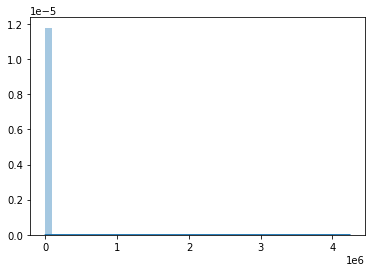

In [36]:
sns.distplot([i for i in all_token_count if i >= 5])

In [40]:
np.median(all_token_count)

1.0

In [41]:
np.mean(all_token_count)

55.01194824628351

In [42]:
len(in_frequent_tokens)

1430095

In [43]:
len(in_frequent_tokens) / len(all_token_count)

0.8587359166156764

In [59]:
len(all_token_count) - len(in_frequent_tokens)

235254

In [60]:
len(all_token_count) 

1665349

## Is there any pre-processing required? e.g., remove the consecutive whitespace, remove some "weird" characters.
- No

## Run AutoPhrase, and then plot the quality score distribution of single-word and multi-word phrases separately. Compare and discuss their differences.

In [87]:
output_dir = '../models/MyDBLP/'
multi_word = open(output_dir + 'AutoPhrase_multi-words.txt').readlines()
single_word = open(output_dir + 'AutoPhrase_single-word.txt').readlines()

In [89]:
multi_word_scores = []
single_word_scores = []
for line in multi_word:
    multi_word_scores.append(float(line.split()[0]))
for line in single_word:
    single_word_scores.append(float(line.split()[0]))

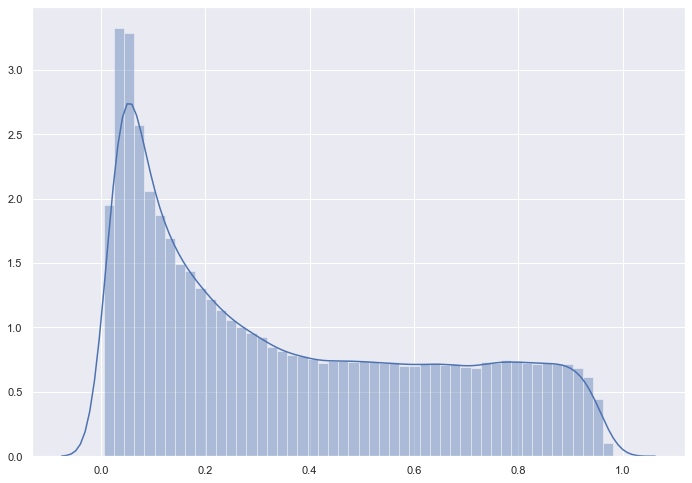

In [78]:
sns.distplot(multi_word_scores)

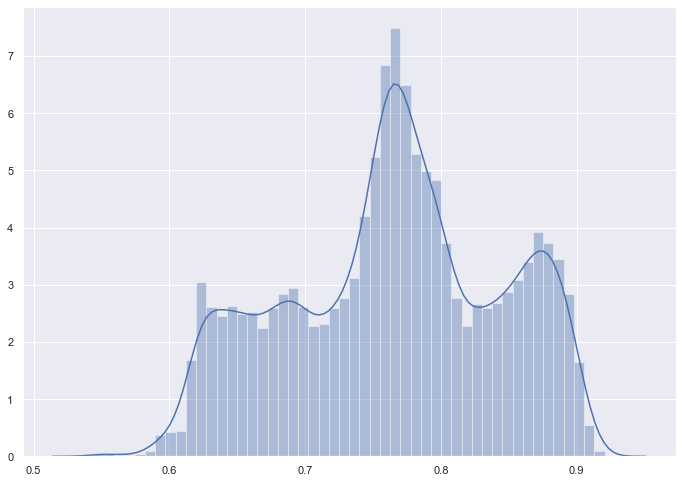

In [91]:
sns.distplot(single_word_scores)

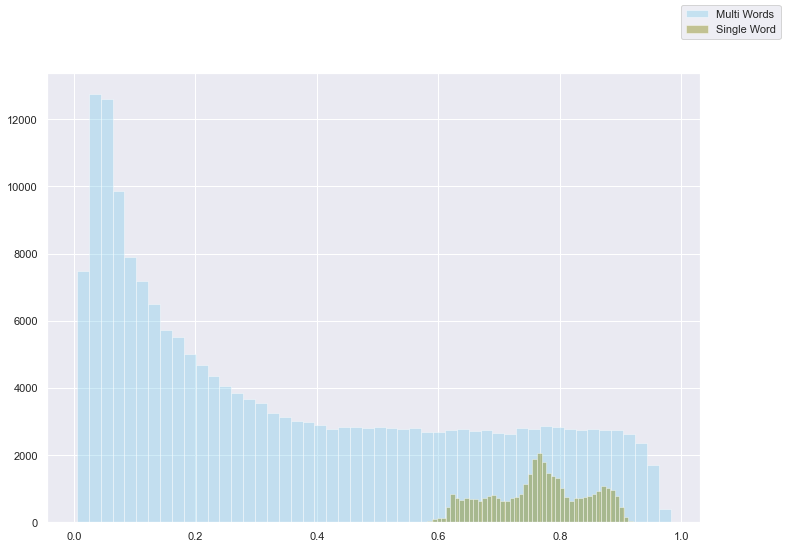

In [100]:
fig = plt.figure(figsize=(11.7,8.27))
sns.distplot( multi_word_scores , color="skyblue", kde = False, label = 'Multi Words')
sns.distplot( single_word_scores , color="olive", kde = False, label = 'Single Word')
fig.legend(labels=['Multi Words','Single Word'])

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [80]:
[s for s in single_word_scores if s > 0.1]

[0.0050906771, 0.0050906771, 0.0050906771, 0.0050906771]

In [81]:
np.mean(np.array(single_word_scores))

0.005090677099999998

In [84]:
len(single_word_scores)

36594